
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


# Reinforcement Learning

This section will provide a **very basic** introduction to Reinforcement Learning (RL): 

- [1 Markov Decision Process](#1-Markov-Decision-Process)
- [2 Q Learning](#2-Q-Learning)
- [3 Deep RL](#3-Deep-RL)
- [4 Hands-on Exercise](#4-Exercise)
- [Reference](#Reference)

**<font color=blue>[Note]</font>**: Most of the materials here were based on the Microsoft free course: https://github.com/microsoft/ML-For-Beginners/blob/main/8-Reinforcement/1-QLearning/README.md and https://towardsdatascience.com/understanding-the-markov-decision-process-mdp-8f838510f150

## 1 Markov Decision Process

RL is to make the *optimal* decision, with model or model-free settings considering the underlying system, to achieve the maximum **reward**. 

### Basics

RL is to make the *optimal* decision, with model or in a model-free setting for the underlying system, to achieve the maximum **reward**. For model-based decision making (control theory), Markov Decision Process (MDP) can serve as the foundation. The underlying dynamic model of MDP can be related to the state-space model that we just introduced. 

MDP often involves the following critical components: 
1. **State** in a state space $\mathcal{X}$;
2. **Action** in the action space $\mathcal{A}$;
3. **Transition** $\mathbf{P}$ governing the state dynamics (state-space models): $\mathbf{P}: \mathcal{X} \times \mathcal{A} \rightarrow \mathcal{X}$ (deterministic) or $\mathbf{P}: \mathcal{X} \times \mathcal{A} \times \mathcal{X} \rightarrow [0, 1]$ (probabilistic);
4. **Reward** $\mathbf{R}$ modeling the expected reward to take a certain action to reach different states: $\mathbf{R}: \mathcal{X} \times \mathcal{A} \times \mathcal{X} \rightarrow \mathbb{R}$. 

With these four elements, we can model how an **agent** may interact with the **environment** based on $\mathbf{P}$. The goal of RL is to derive a good **policy** to achieve the best reward based on $\mathbf{R}$. If we have the model $\mathbf{P}$ and $\mathbf{R}$, we are with model-based RL. Otherwise, we are doing model-free RL, a famous one of which is **Q-learning**. 





<img src="https://miro.medium.com/max/6000/1*p4JW6ibYcdmaeXVB_klivA.png" alt="MDP1">

<center>A Schematic for an artificial MDP</center>

<img src="https://miro.medium.com/max/1750/1*QLeo3MikUeGvNyVjl5mqoA.png" alt="MDP2">

<center>A Schematic for a Robot MDP</center>


### Markov Property

MDP can be considered as a **Markov Chain** with actions and assigned rewards. The introductory materials of MDP often starts with the finite state space and action space. Given the current state, the future is often assumed to be **conditionally independent** with the past, known as **Markov property**: 
$$\mathbf{P}(x_{t+1} | x_t, a_t; \mbox{ the past state-action history }) = \mathbf{P}(x_{t+1} | x_{t}, a_t).$$




### MDP problem formulations

The goal is to derive a **control policy** to specific which action to take given the state at specific time: 
$$\pi(a|x; t) = P(A_t = a | X_t = x). $$

The control policy can be either **deterministic** or **probabilistic**. If the policy is not dependent on time, $\pi(a|x; t) =\pi(a |x)$, then it is **stationary**, which is often the case in many applications.  


### Value Iteration

#### Policy Value: 

The **value** of a given policy $\pi(a|x)$ at $x$ is the **expected cumulative rewards** (often discounted) with the **discount factor** $\gamma \in (0, 1)$: 
$$V(x) = \mathbb{E}_P[\mathbf{R}(x_0=x, a_0, x_1) + \gamma \mathbf{R}(x_1, a_1, x_2) + \ldots + \gamma^t \mathbf{R}(x_t, a_t, x_{t+1}) + \ldots|\pi]$$

By divide and conquer (an important trick for **dynamic programming**): 
$$V(x) = \mathbb{E}_{x_1}[\mathbb{E}_P[\mathbf{R}(x_0=x, a_0, x_1) + \gamma V(x_1)]]$$

#### Optimal value and optimal action: 

The logic of dynamic programming: To achieve the optimality of the whole sequence, each sub-sequence shall be also optimal. This leads to the famous **Bellman Optimality Equation**: 

$$V_{opt}(x) = \max_{a\in\mathcal{A}}{\sum_{x_1} \mathbf{P}(x_1|x_0=x, a_0=a)(\mathbf{R}(x_0=x, a_0, x_1) + \gamma V_{opt}(x_1) )}$$

Assume that the iteration converges to a **stationary** policy (discounting). This immediate gives the **value iteration algorithm**: 

$$V_{k+1} = \max_{a\in\mathcal{A}}{\sum_{x'} \mathbf{P}(x'|x, a)(\mathbf{R}(x, a, x') + \gamma V_{k}(x') )}.$$

$V_{k} \rightarrow V_{opt}$ for stationary control policies. 

### State-Action (Q) Value

The Q value of a given policy $\pi(a|x)$ at $x$ with action $a$ is the expected cumulative rewards with the discount factor $\gamma$:
$$Q(x, a) = \mathbb{E}_{x_1}[\mathbb{E}_P[\mathbf{R}(x_0=x, a_0=a, x_1) + \gamma \max_{a_1} Q(x_1, a_1)]].$$

It has the same recursive structure. 

### Q value iteration algorithm: 

We can now derive the **optimal policy**: 
$$\pi_{opt}(a|x) = \arg\max_a Q_{opt}(x,a),$$
where $Q_{opt}(x,a) = \mathbf{R}'(x_0=x, a_0=a) + \gamma \sum_{x_1} \mathbf{P}(x_1|x,a) V_{opt}(x_1)$ and $V_{opt}(x_1)$ can be solved: 
$$V_{opt}(x_1) = \max_{a} Q(x_1, a)$$
as done by value iteration. 

And 
$$Q_{k+1}(x,a) = \sum_{x'} \mathbf{P}(x'|x, a)(\mathbf{R}(x, a, x') + \gamma \max_{a_1} Q_k(x_1, a_1))$$
(Q-value iteraction).

### Policy Iteration

We can also derive the **policy iteration** algorithm with the same dynamic programming trick: 

$$\pi_k(a|x) = \arg\max_a{\sum_{x'} \mathbf{P}(x'|x, a)(\mathbf{R}(x, a, x') + \gamma V_{\pi_k}(x') )},$$
where $V_{\pi_k}(x')$ is evaluated value based on the previous policy. 

## 2 Q Learning

Q Learning is a model-free RL method when we do not have the model for transition $\mathbf{P}$ or reward $\mathbf{R}$. Note that to be exact, RL often referrs to the model-free situations where you have to derive the policy based on the interaction between the agent and environment through experience/observations, *in an end-to-end fashion*. The policy $\pi(a|x)$ is learned only driven by the observed reward $r(x,a)$, for example as "relayed experience". 

$$ \mathcal{D} = \{(x, a, r, x')_t\}_{t=0}^{T} \rightarrow Q_{opt}(x, a) \rightarrow \pi_{opt}(a|x) $$

### Q Learning Algorithm

1. Initialize Q-Table **$Q$** with equal numbers for all states and actions
2. Set **learning rate** $\alpha\leftarrow 1$
3. Repeat simulation many times

   A. Start at random position

   B. Repeat

      1. Select an action $a$ at state $x$
      2. Exectute action by moving to a new state $x'$
      3. If we encounter end-of-game condition, or total reward is too small - exit simulation
      4. Compute reward $r$ at the new state
      5. Update Q-Function according to Bellman equation: $$Q(x,a)\leftarrow (1-\alpha)Q(x,a)+\alpha(r+\gamma\max_{a'}Q(x',a'))$$
      6. $x\leftarrow x'$
      7. Update total reward and decrease $\alpha$.

Check the above updating equation: 
$$Q(x,a) \leftarrow Q(x,a) + \alpha(r+\gamma\max_{a'}Q(x',a') - Q(x,a))$$. 

Similarity to what we have seen for other gradient descent updates. 

### Exploration vs. Exploitation

At the step **3.B.2**, if random policy is adopted, it is simply **exploring** the state and action space randomly, which can be time-consuming to converge to the optimal policy. 

**$\epsilon$-greedy policy**: With $1-\epsilon$ probabilty to take the action that gives the best Q value (**exploitation**). 


### Temporal Difference Learning

Similarly, from the value iteration algorithm, we can derive the corresponding Temporal Difference Learning (TD Learning): 

$$V(x)\leftarrow (1-\alpha)V(x)+\alpha(r+\gamma V(x'))$$

This is simply updating the running average (**incremental learning**). 

Please check the following links for related examples: 

https://github.com/ageron/handson-ml/blob/master/16_reinforcement_learning.ipynb

https://github.com/microsoft/ML-For-Beginners/blob/main/8-Reinforcement/1-QLearning/solution/notebook.ipynb

### Q Learning with Function Approximation

Instead of estimating Q value based on running average as above, it may be beneficial to have a model or function to **approximate** the Q value so that we may further improve the convergence properties if we can quickly learn a reasonably good function approximation: 

$$Q(x, a) \leftarrow \tilde{Q}(x, a; \theta)$$

In the above algorithm, instead of directly estimating $Q$, we can update the model parameter $\theta$ (related to **SGD**): 

$$\theta \leftarrow \theta + \alpha_t (r_t +\gamma \max_{a'}\tilde{Q}(x',a'; \theta) - \tilde{Q}(x,a; \theta) )\nabla_\theta \tilde{Q}(x, a; \theta) $$

Clearly, different function approximation can be adopted here as in other machine learning problems. This leads to the recent development of **Deep RL**. 

### Policy Gradient

Another branch is to directly approximate the policy and learn it end-to-end: 
$$\pi(a|x) \leftarrow \tilde{\pi}(a|x; \theta)$$

We will not discuss here this in detail. One of important challenges to address is to derive good gradient estimate of $\nabla_\theta \tilde{\pi}(a|x; \theta)$. One of famous estimation method is **REINFORCE**. There have been many new methods to improve policy gradient by either better modeling $\tilde{\pi}(a|x; \theta)$ or better gradient estimates. 

## 3 Deep Q Learning

<img src="https://pylessons.com/static/images/Reinforcement-learning/03_CartPole-reinforcement-learning/Dueling-Q-architecture.jpg" alt="DQL" size=500>

<center>A Schematic for deep Q learning</center>


<img src="https://developer.ibm.com/developer/default/articles/machine-learning-and-gaming/images/Figure5.png" alt="DQL" size=500>

<center>A Schematic for deep Q learning for policy gradient in Gaming </center>


Note that once the approximating neural network, MLP, CNN, RNN, or GNN based on the state and action space, is specified, the learning is the same as all the other machine learning problems. 

Here, also note that we are not restricted ourselves to finite state or action space any more!

There have been also many challenges to theoretically analyze DQN performances and empirically further improve DQN. Two main issues with vanilla DQN is the **bias** problem of overestimating Q values in noisy environment and the **moving target** problem due to using the same DQN to evaluate and choose actions. There have been recent efforts to address these problems, including **Prioritized experience replay** and **dueling/double DQN**, etc. 


More tutorials can be found at: 

https://github.com/pythonlessons/Reinforcement_Learning

## 4 Hands-on Exercise: Lunar Lander V2
We use an OpenAI Gym's example [LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/) as the environments for the DQN algorithm. [Shiva Verma's code](https://github.com/shivaverma/OpenAIGym/blob/master/lunar-lander/discrete/lunar_lander.py) is used for the following implementation. 

<img src="https://miro.medium.com/max/1346/1*i7lxpgt2K3Q8lgEPJu3_xA.png" alt="DQL" size=500>
<center>A Schematic for LunarLander-v2</center>

LunarLander-v2 describes a qeustion that we need to control a lunar lander to land on a specific landing position. The specific settings for the problem are:

The action space consists of four actions: 0-do nothing; 1-Fire left orientation engine, 2-Fire down main engine, and 3-Fire right orientation engine.

Landing pad is always at coordinates (0,0). Coordinates are the first two numbers in state vector.

Reward for moving from the top of the screen to landing pad and zero speed is about 100..140 points. If lander moves away from landing pad it loses reward back. 

Episode finishes if the lander crashes or comes to rest, receiving additional -100 or +100 points. Each leg ground contact is +10. Firing main engine is -0.3 points each frame. Solved is 200 points. Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.

In [ ]:
# Install the environments
!apt update
!apt install xvfb
!pip install pyvirtualdisplay
!pip install ribs[all] gym~=0.17.0 Box2D~=2.3.10 tqdm

# Start Xvfb and set "DISPLAY" environment properly.
import pyvirtualdisplay
d = pyvirtualdisplay.Display()
d.start() 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
import gym
import random
import numpy as np
from tensorflow.keras import Sequential
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, linear

import base64
import io
from gym.wrappers import Monitor
from IPython import display
from IPython.display import Image
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v2")
env = Monitor(env, 'videos', force=True)
np.random.seed(0)

d = Display()
d.start()


# Construct DQN model
class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0
        self.gamma = .99
        self.batch_size = 64
        self.epsilon_min = .01
        self.lr = 0.001
        self.epsilon_decay = .996
        self.memory = deque(maxlen=1000000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(150, input_dim=self.state_space, activation=relu))
        model.add(Dense(120, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        model.compile(loss='mse', optimizer=Adam(lr=self.lr))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)
        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# Display the lunar lander actions for each episode
def render(env):
    if len(env.videos) > 0:
            f = env.videos[-1]
            video = io.open(f[0], 'r+b').read()
            encoded = base64.b64encode(video)

            display.display(display.HTML(data="""
                <video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>
                """.format(encoded.decode('ascii'))))

# train the DQN model
def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 8))
        score = 0
        max_steps = 3000
        for i in range(max_steps):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 8))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
        render(env)
            
        # Average score of last 100 episode
        is_solved = np.mean(loss[-100:])
        if is_solved > 200:
            print('\n Task Completed! \n')
            break
        print("Average over last 100 episode: {0:.2f} \n".format(is_solved))
    return loss


Box(-inf, inf, (8,), float32)
Discrete(4)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


episode: 0/3, score: -219.4938750079295
Average over last 100 episode: -219.49 

episode: 1/3, score: -281.70475740781336


Average over last 100 episode: -250.60 

episode: 2/3, score: -438.1160373820796


Average over last 100 episode: -313.10 



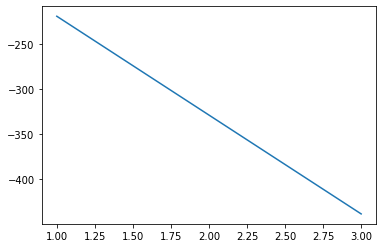

In [ ]:
print(env.observation_space)
print(env.action_space)
episodes = 400
loss = train_dqn(episodes)
plt.plot([i+1 for i in range(0, len(loss), 2)], loss[::2])
plt.show()

## Reference
*Some materials in this section are adapted from several resources listed below:* 

- https://towardsdatascience.com/
- An Introduction to Statistical Learning : with Applications in R by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. New York: Springer, 2013.
- Open Machine Learning Course mlcourse.ai.
- Reinforcement Learning: An Introduction (textbook): http://incompleteideas.net/book/the-book-2nd.html

# Questions? 

In [ ]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)